In [8]:
from google.colab import files
uploaded = files.upload()


Saving KaggleV2-May-2016.csv.zip to KaggleV2-May-2016.csv.zip


In [9]:
import zipfile
import os

with zipfile.ZipFile("KaggleV2-May-2016.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Optional: list the files
os.listdir()


['.config',
 'KaggleV2-May-2016.csv.zip',
 '.ipynb_checkpoints',
 'drive',
 'KaggleV2-May-2016.csv',
 'sample_data']

In [10]:
import pandas as pd

df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.columns = df.columns.str.strip().str.replace("-", "_").str.replace(" ", "_")


In [12]:
df = df[df['Age'] >= 0]


In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [14]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


In [15]:
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})


In [16]:
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)


In [17]:
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood'], drop_first=True)


In [18]:
df.drop_duplicates(inplace=True)


In [19]:
df.to_csv("appointments_cleaned.csv", index=False)
files.download("appointments_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd

df = pd.read_csv("appointments_cleaned.csv")


In [21]:
X = df.drop("No_show", axis=1)
y = df["No_show"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Drop any datetime columns that are not numeric
X = X.drop(columns=['ScheduledDay', 'AppointmentDay'], errors='ignore')


In [26]:
X = df.drop(["No_show", "ScheduledDay", "AppointmentDay"], axis=1, errors='ignore')
y = df["No_show"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7990809408981301

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17576
           1       0.43      0.01      0.02      4403

    accuracy                           0.80     21979
   macro avg       0.62      0.50      0.45     21979
weighted avg       0.73      0.80      0.71     21979


Confusion Matrix:
 [[17523    53]
 [ 4363    40]]


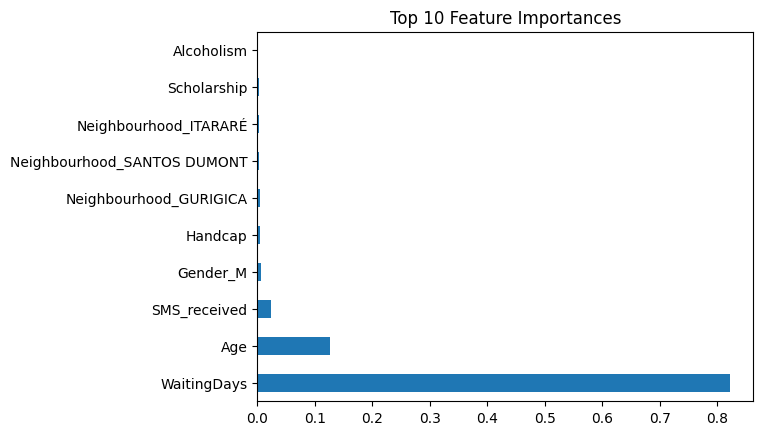

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [29]:
df['Predicted_No_show'] = model.predict(X)
df.to_csv("appointments_final.csv", index=False)


In [30]:
from google.colab import files
files.download("appointments_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>